In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
from rasterio import plot
import rasterio.mask
from pathlib import Path
from matplotlib import colors
from skimage import exposure

---
# MNDWI = (B3-B11)/(green+swir)
NDWI = (B03 - B08) / (B03 + B08)

---

In [2]:
# Load polygon vector
boundsdata = r'../data/chadwicklakes.geojson'
region = gpd.read_file(boundsdata)
region

nReserve_proj = region.to_crs({'init': 'epsg:32633'})

p = ('../data/selecteddata/12 per annum (2020)')

C:\Users\MCAST\anaconda3\envs\remsen\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


 12 per annum (2020)
--- 01.MSIL1C_18-01-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20200118T110609_S20200118T095554
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A014977_20200118T095554
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200118T095229_B01.jp2
--------------- T33SVV_20200118T095229_B02.jp2
--------------- T33SVV_20200118T095229_B03.jp2
--------------- T33SVV_20200118T095229_B04.jp2
--------------- T33SVV_20200118T095229_B05.jp2
--------------- T33SVV_20200118T095229_B06.jp2
--------------- T33SVV_20200118T095229_B07.jp2
--------------- T33SVV_20200118T095229_B08.jp2
--------------- T33SVV_20200118T095229_B09.jp2
--------------- T33SVV_20200118T095229_B10.jp2
--------------- T33SVV_20200118T095229_B11.jp2
--------------- T33SVV_20200118T095229_B12.jp2
--------------- T33SVV_20200118T095229_B8A.jp2
--------------- T33SVV_20200118T095229_TCI.jp2


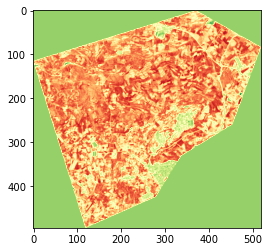

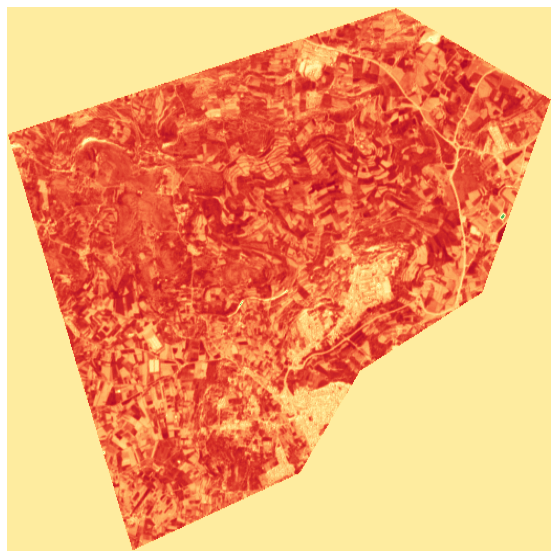

------------ QI_DATA
------ HTML
------ rep_info
--- 02.MSIL1C_07-02-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20200207T110843_S20200207T095055
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A015263_20200207T095055
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200207T095059_B01.jp2
--------------- T33SVV_20200207T095059_B02.jp2
--------------- T33SVV_20200207T095059_B03.jp2
--------------- T33SVV_20200207T095059_B04.jp2
--------------- T33SVV_20200207T095059_B05.jp2
--------------- T33SVV_20200207T095059_B06.jp2
--------------- T33SVV_20200207T095059_B07.jp2
--------------- T33SVV_20200207T095059_B08.jp2
--------------- T33SVV_20200207T095059_B09.jp2
--------------- T33SVV_20200207T095059_B10.jp2
--------------- T33SVV_20200207T095059_B11.jp2
--------------- T33SVV_20200207T095059_B12.jp2
--------------- T33SVV_20200207T095059_B8A.jp2
--------------- T33SVV_20200207T095059_TCI.jp2


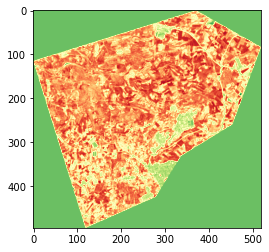

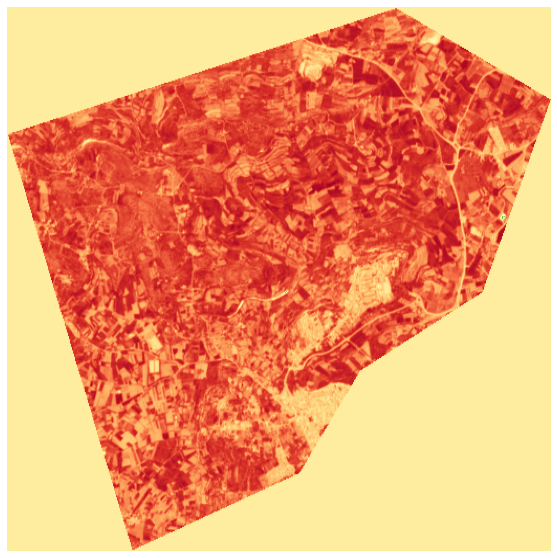

------------ QI_DATA
------ HTML
------ rep_info
--- 03.MSIL1C_13-03-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200313T102505_S20200313T095203
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A024672_20200313T095203
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200313T095031_B01.jp2
--------------- T33SVV_20200313T095031_B02.jp2
--------------- T33SVV_20200313T095031_B03.jp2
--------------- T33SVV_20200313T095031_B04.jp2
--------------- T33SVV_20200313T095031_B05.jp2
--------------- T33SVV_20200313T095031_B06.jp2
--------------- T33SVV_20200313T095031_B07.jp2
--------------- T33SVV_20200313T095031_B08.jp2
--------------- T33SVV_20200313T095031_B09.jp2
--------------- T33SVV_20200313T095031_B10.jp2
--------------- T33SVV_20200313T095031_B11.jp2
--------------- T33SVV_20200313T095031_B12.jp2
--------------- T33SVV_20200313T095031_B8A.jp2
--------------- T33SVV_20200313T095031_TCI.jp2


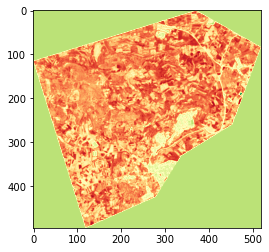

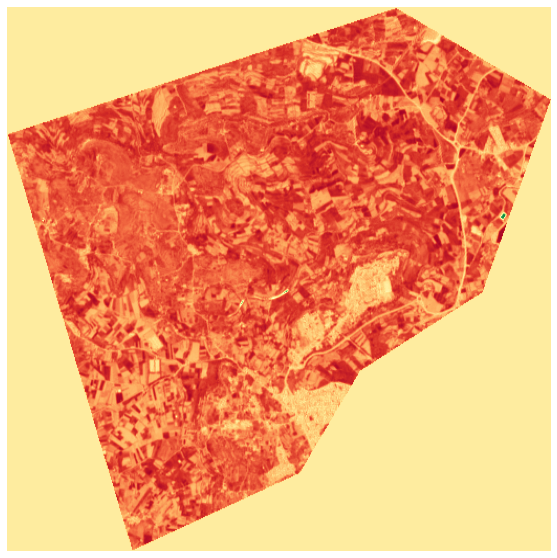

------------ QI_DATA
------ HTML
------ rep_info
--- 04.MSIL1C_17-04-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200417T121239_S20200417T095907
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A016264_20200417T095907
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200417T095029_B01.jp2
--------------- T33SVV_20200417T095029_B02.jp2
--------------- T33SVV_20200417T095029_B03.jp2
--------------- T33SVV_20200417T095029_B04.jp2
--------------- T33SVV_20200417T095029_B05.jp2
--------------- T33SVV_20200417T095029_B06.jp2
--------------- T33SVV_20200417T095029_B07.jp2
--------------- T33SVV_20200417T095029_B08.jp2
--------------- T33SVV_20200417T095029_B09.jp2
--------------- T33SVV_20200417T095029_B10.jp2
--------------- T33SVV_20200417T095029_B11.jp2
--------------- T33SVV_20200417T095029_B12.jp2
--------------- T33SVV_20200417T095029_B8A.jp2
--------------- T33SVV_20200417T095029_TCI.jp2


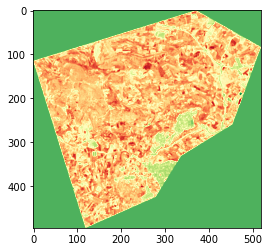

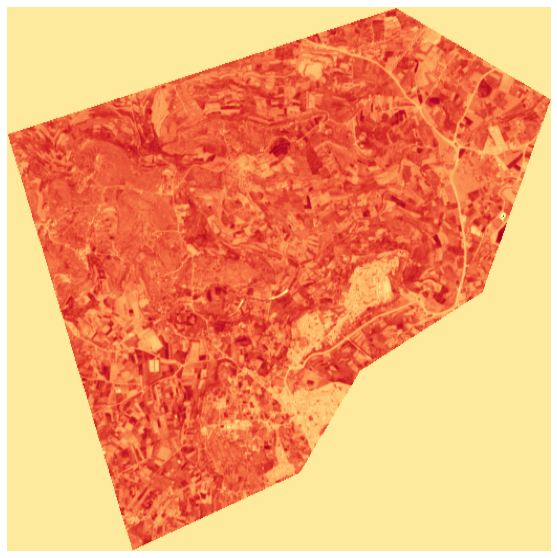

------------ QI_DATA
------ HTML
------ rep_info
--- 05.S2B_MSIL1C_17-05-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200517T120843_S20200517T095822
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A016693_20200517T095822
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200517T095029_B01.jp2
--------------- T33SVV_20200517T095029_B02.jp2
--------------- T33SVV_20200517T095029_B03.jp2
--------------- T33SVV_20200517T095029_B04.jp2
--------------- T33SVV_20200517T095029_B05.jp2
--------------- T33SVV_20200517T095029_B06.jp2
--------------- T33SVV_20200517T095029_B07.jp2
--------------- T33SVV_20200517T095029_B08.jp2
--------------- T33SVV_20200517T095029_B09.jp2
--------------- T33SVV_20200517T095029_B10.jp2
--------------- T33SVV_20200517T095029_B11.jp2
--------------- T33SVV_20200517T095029_B12.jp2
--------------- T33SVV_20200517T095029_B8A.jp2
--------------- T33SVV_20200517T095029_TCI.jp2


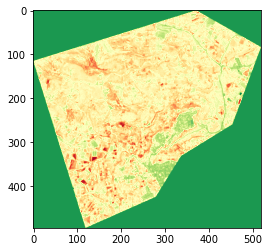

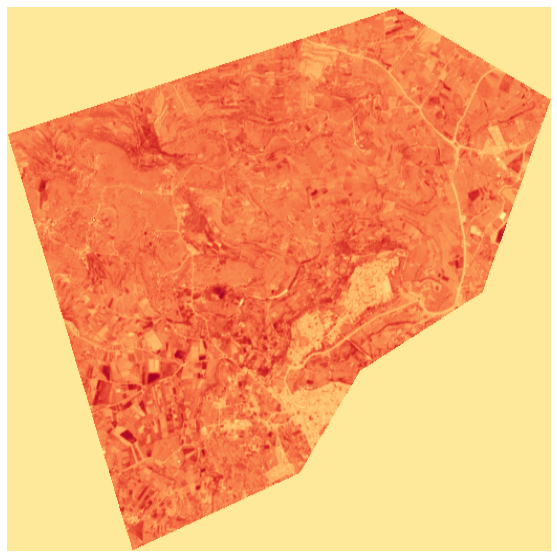

------------ QI_DATA
------ HTML
------ rep_info
--- 06.MSIL1C_26-06-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200626T120527_S20200626T100016
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A017265_20200626T100016
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200626T095029_B01.jp2
--------------- T33SVV_20200626T095029_B02.jp2
--------------- T33SVV_20200626T095029_B03.jp2
--------------- T33SVV_20200626T095029_B04.jp2
--------------- T33SVV_20200626T095029_B05.jp2
--------------- T33SVV_20200626T095029_B06.jp2
--------------- T33SVV_20200626T095029_B07.jp2
--------------- T33SVV_20200626T095029_B08.jp2
--------------- T33SVV_20200626T095029_B09.jp2
--------------- T33SVV_20200626T095029_B10.jp2
--------------- T33SVV_20200626T095029_B11.jp2
--------------- T33SVV_20200626T095029_B12.jp2
--------------- T33SVV_20200626T095029_B8A.jp2
--------------- T33SVV_20200626T095029_TCI.jp2


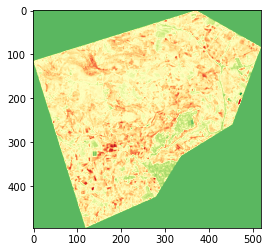

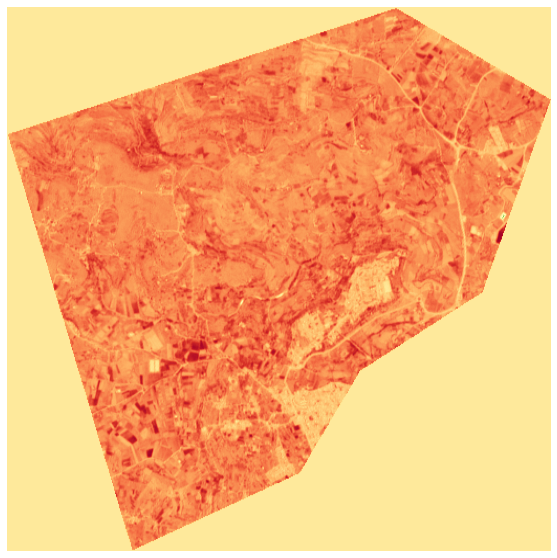

------------ QI_DATA
------ HTML
------ rep_info
--- 07.MSIL1C_31-07-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200731T102505_S20200731T095357
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A026674_20200731T095357
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200731T095041_B01.jp2
--------------- T33SVV_20200731T095041_B02.jp2
--------------- T33SVV_20200731T095041_B03.jp2
--------------- T33SVV_20200731T095041_B04.jp2
--------------- T33SVV_20200731T095041_B05.jp2
--------------- T33SVV_20200731T095041_B06.jp2
--------------- T33SVV_20200731T095041_B07.jp2
--------------- T33SVV_20200731T095041_B08.jp2
--------------- T33SVV_20200731T095041_B09.jp2
--------------- T33SVV_20200731T095041_B10.jp2
--------------- T33SVV_20200731T095041_B11.jp2
--------------- T33SVV_20200731T095041_B12.jp2
--------------- T33SVV_20200731T095041_B8A.jp2
--------------- T33SVV_20200731T095041_TCI.jp2


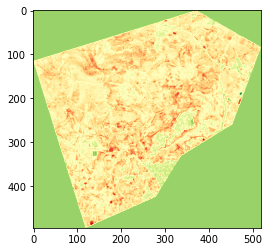

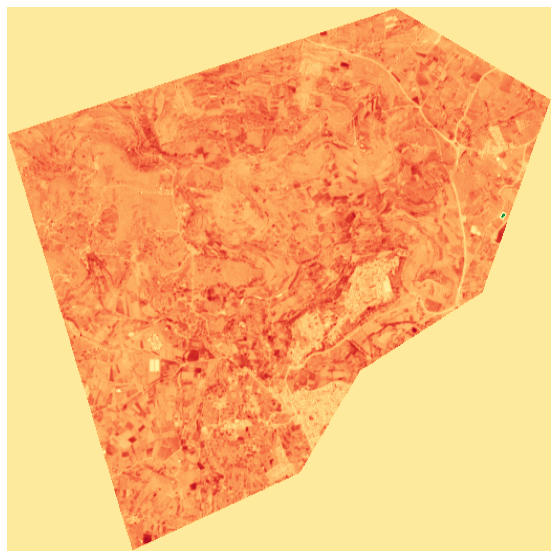

------------ QI_DATA
------ HTML
------ rep_info
--- 08.MSIL1C_12-08-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20200812T111443_S20200812T094034
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A017937_20200812T094034
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200812T094039_B01.jp2
--------------- T33SVV_20200812T094039_B02.jp2
--------------- T33SVV_20200812T094039_B03.jp2
--------------- T33SVV_20200812T094039_B04.jp2
--------------- T33SVV_20200812T094039_B05.jp2
--------------- T33SVV_20200812T094039_B06.jp2
--------------- T33SVV_20200812T094039_B07.jp2
--------------- T33SVV_20200812T094039_B08.jp2
--------------- T33SVV_20200812T094039_B09.jp2
--------------- T33SVV_20200812T094039_B10.jp2
--------------- T33SVV_20200812T094039_B11.jp2
--------------- T33SVV_20200812T094039_B12.jp2
--------------- T33SVV_20200812T094039_B8A.jp2
--------------- T33SVV_20200812T094039_TCI.jp2


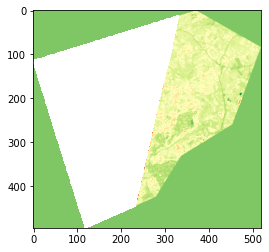

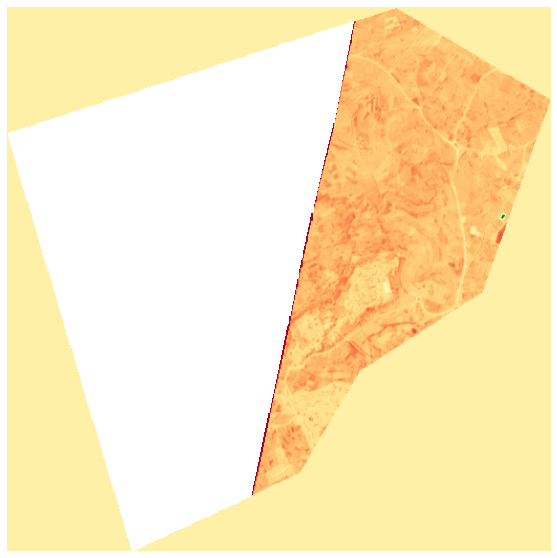

------------ QI_DATA
------ HTML
------ rep_info
--- 09.MSIL1C_24-09-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_VGS2_20200924T120423_S20200924T095911
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A018552_20200924T095911
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200924T095029_B01.jp2
--------------- T33SVV_20200924T095029_B02.jp2
--------------- T33SVV_20200924T095029_B03.jp2
--------------- T33SVV_20200924T095029_B04.jp2
--------------- T33SVV_20200924T095029_B05.jp2
--------------- T33SVV_20200924T095029_B06.jp2
--------------- T33SVV_20200924T095029_B07.jp2
--------------- T33SVV_20200924T095029_B08.jp2
--------------- T33SVV_20200924T095029_B09.jp2
--------------- T33SVV_20200924T095029_B10.jp2
--------------- T33SVV_20200924T095029_B11.jp2
--------------- T33SVV_20200924T095029_B12.jp2
--------------- T33SVV_20200924T095029_B8A.jp2
--------------- T33SVV_20200924T095029_TCI.jp2


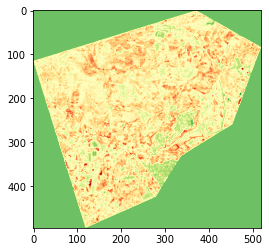

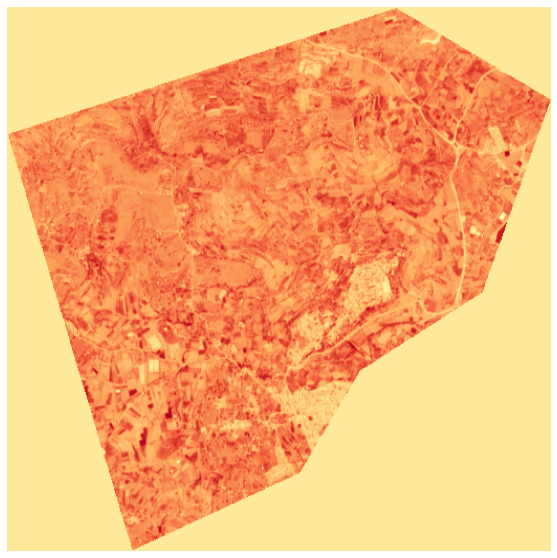

------------ QI_DATA
------ HTML
------ rep_info
--- 10.S2A_MSIL1C_29-10-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_VGS2_20201029T120124_S20201029T100032
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A027961_20201029T100032
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20201029T095131_B01.jp2
--------------- T33SVV_20201029T095131_B02.jp2
--------------- T33SVV_20201029T095131_B03.jp2
--------------- T33SVV_20201029T095131_B04.jp2
--------------- T33SVV_20201029T095131_B05.jp2
--------------- T33SVV_20201029T095131_B06.jp2
--------------- T33SVV_20201029T095131_B07.jp2
--------------- T33SVV_20201029T095131_B08.jp2
--------------- T33SVV_20201029T095131_B09.jp2
--------------- T33SVV_20201029T095131_B10.jp2
--------------- T33SVV_20201029T095131_B11.jp2
--------------- T33SVV_20201029T095131_B12.jp2
--------------- T33SVV_20201029T095131_B8A.jp2
--------------- T33SVV_20201029T095131_TCI.jp2


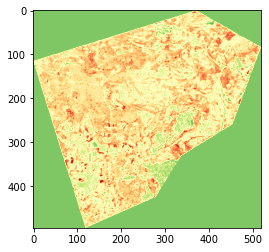

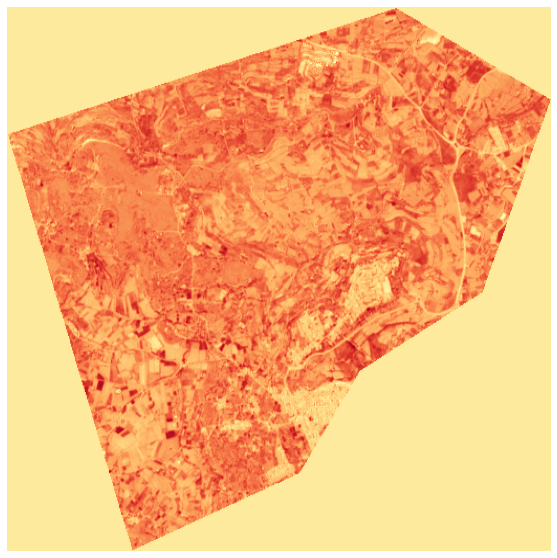

------------ QI_DATA
------ HTML
------ rep_info
--- 12.MSIL1C_05-12-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20201205T110115_S20201205T094357
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A028490_20201205T094357
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20201205T094401_B01.jp2
--------------- T33SVV_20201205T094401_B02.jp2
--------------- T33SVV_20201205T094401_B03.jp2
--------------- T33SVV_20201205T094401_B04.jp2
--------------- T33SVV_20201205T094401_B05.jp2
--------------- T33SVV_20201205T094401_B06.jp2
--------------- T33SVV_20201205T094401_B07.jp2
--------------- T33SVV_20201205T094401_B08.jp2
--------------- T33SVV_20201205T094401_B09.jp2
--------------- T33SVV_20201205T094401_B10.jp2
--------------- T33SVV_20201205T094401_B11.jp2
--------------- T33SVV_20201205T094401_B12.jp2
--------------- T33SVV_20201205T094401_B8A.jp2
--------------- T33SVV_20201205T094401_TCI.jp2


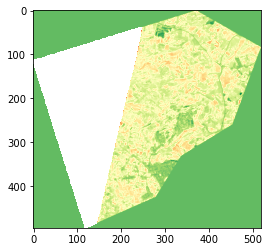

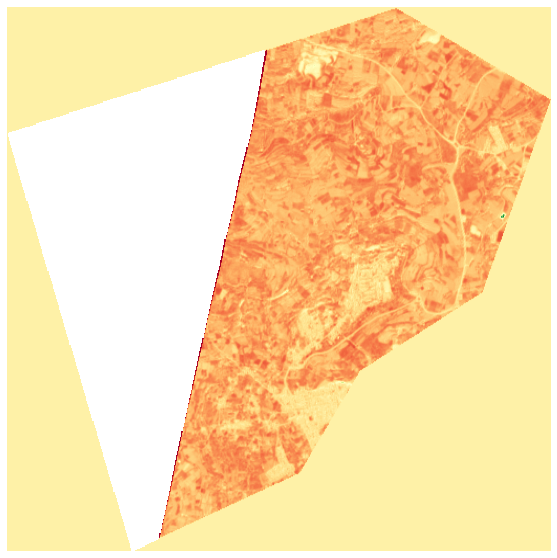

------------ QI_DATA
------ HTML
------ rep_info


In [3]:
path = Path(p)
k=0
# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk(p):
    path = root.split(os.sep)
    print((len(path) - 1) * '---', os.path.basename(root))


    #print(path[:6])

    if os.path.basename(root) == 'IMG_DATA':
        k+=1
        for file in files:
            print(len(path) * '---', file)

            if 'B03' in file: band3 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #Green

            if 'B08' in file: band11 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #NIR

        green = band3.read()
        swir = band11.read()

        # Do not display error when divided by zero
        np.seterr(divide='ignore', invalid='ignore')

        #green = np.resize(green,(1, 5490, 5490))
        #swir = np.resize(swir,(1, 10980, 10980))

        # Calculate ndvi
        MNDWI = (green.astype(float)-swir.astype(float))/(green+swir)

        # get the dtype of our MNDWI array:
        MNDWI_dtype = MNDWI.dtype

        # Write the MNDWI image
        meta = band3.meta
        meta.update(driver='GTiff')
        meta.update(dtype=rasterio.float64)

        with rasterio.open('../Output/MNDWI.tif', 'w', **meta) as dst:
            dst.write(MNDWI)

        # Crop MNDWI to ROI
        with rio.open("../Output/MNDWI.tif") as src:
            out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
            out_meta = src.meta.copy()
            out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        with rasterio.open('../Output/MNDWI_cropped.tif', 'w', **meta) as dst:
            dst.write(out_image)
        plot.show(out_image, cmap='RdYlGn')


        # Interpretation of MNDWI
        class MidpointNormalize(colors.Normalize):
            def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
                self.midpoint = midpoint
                colors.Normalize.__init__(self, vmin, vmax, clip)

            def __call__(self, value, clip=None):

                x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
                return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

        # Set min/max values from MNDWI range for image
        min=np.nanmin(out_image)
        max=np.nanmax(out_image)

        # Set our custom midpoint for most effective MNDWI analysis
        mid=0.1

        # Setting color scheme ref:https://matplotlib.org/users/colormaps.html as a reference
        colormap = plt.cm.RdYlGn
        norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(111)

        MNDWI_cropped = rasterio.open("../Output/MNDWI_cropped.tif")
        # Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
        cbar_plot = ax.imshow(MNDWI_cropped.read(1), cmap=colormap, vmin=min, vmax=max, norm=norm)

        ax.axis('off')
        #ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

        # Configure the colorbar
        #cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

        # Call 'savefig' to save this plot to an image file
        fig.savefig("../Output/MNDWI-" + str(k) + "-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

        # let's visualize
        plt.show()

---
# MNDWI = (B3-B11)/(green+swir)
---

 12 per annum (2020)
--- 01.MSIL1C_18-01-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20200118T110609_S20200118T095554
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A014977_20200118T095554
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200118T095229_B01.jp2
--------------- T33SVV_20200118T095229_B02.jp2
--------------- T33SVV_20200118T095229_B03.jp2
--------------- T33SVV_20200118T095229_B04.jp2
--------------- T33SVV_20200118T095229_B05.jp2
--------------- T33SVV_20200118T095229_B06.jp2
--------------- T33SVV_20200118T095229_B07.jp2
--------------- T33SVV_20200118T095229_B08.jp2
--------------- T33SVV_20200118T095229_B09.jp2
--------------- T33SVV_20200118T095229_B10.jp2
--------------- T33SVV_20200118T095229_B11.jp2
--------------- T33SVV_20200118T095229_B12.jp2
--------------- T33SVV_20200118T095229_B8A.jp2
--------------- T33SVV_20200118T095229_TCI.jp2


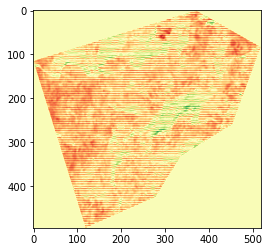

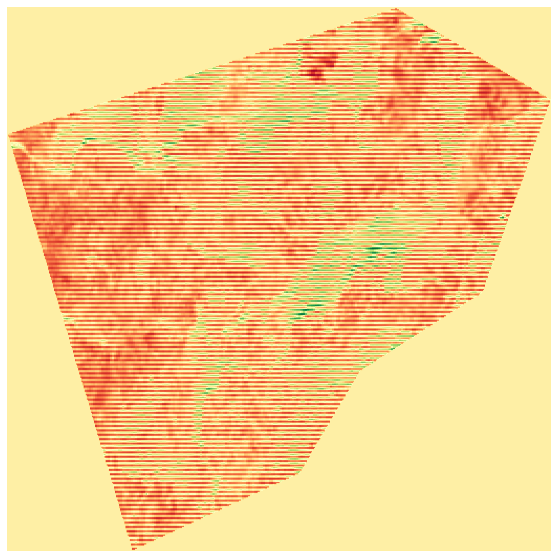

------------ QI_DATA
------ HTML
------ rep_info
--- 02.MSIL1C_07-02-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20200207T110843_S20200207T095055
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A015263_20200207T095055
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200207T095059_B01.jp2
--------------- T33SVV_20200207T095059_B02.jp2
--------------- T33SVV_20200207T095059_B03.jp2
--------------- T33SVV_20200207T095059_B04.jp2
--------------- T33SVV_20200207T095059_B05.jp2
--------------- T33SVV_20200207T095059_B06.jp2
--------------- T33SVV_20200207T095059_B07.jp2
--------------- T33SVV_20200207T095059_B08.jp2
--------------- T33SVV_20200207T095059_B09.jp2
--------------- T33SVV_20200207T095059_B10.jp2
--------------- T33SVV_20200207T095059_B11.jp2
--------------- T33SVV_20200207T095059_B12.jp2
--------------- T33SVV_20200207T095059_B8A.jp2
--------------- T33SVV_20200207T095059_TCI.jp2


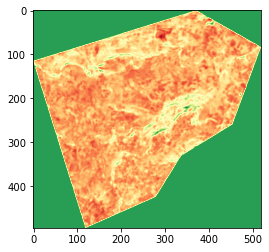

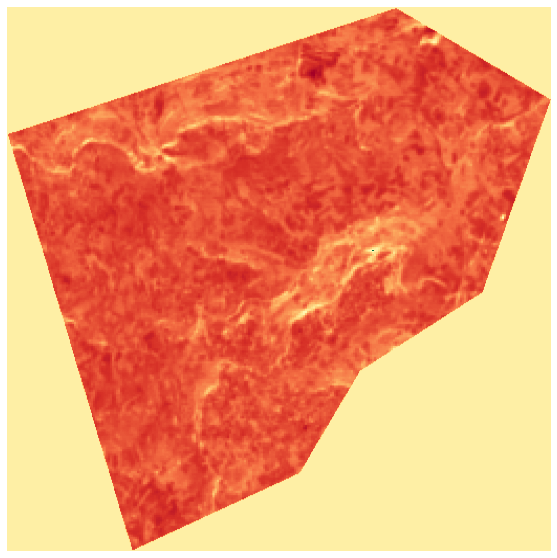

------------ QI_DATA
------ HTML
------ rep_info
--- 03.MSIL1C_13-03-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200313T102505_S20200313T095203
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A024672_20200313T095203
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200313T095031_B01.jp2
--------------- T33SVV_20200313T095031_B02.jp2
--------------- T33SVV_20200313T095031_B03.jp2
--------------- T33SVV_20200313T095031_B04.jp2
--------------- T33SVV_20200313T095031_B05.jp2
--------------- T33SVV_20200313T095031_B06.jp2
--------------- T33SVV_20200313T095031_B07.jp2
--------------- T33SVV_20200313T095031_B08.jp2
--------------- T33SVV_20200313T095031_B09.jp2
--------------- T33SVV_20200313T095031_B10.jp2
--------------- T33SVV_20200313T095031_B11.jp2
--------------- T33SVV_20200313T095031_B12.jp2
--------------- T33SVV_20200313T095031_B8A.jp2
--------------- T33SVV_20200313T095031_TCI.jp2


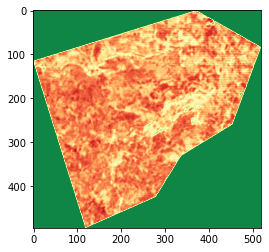

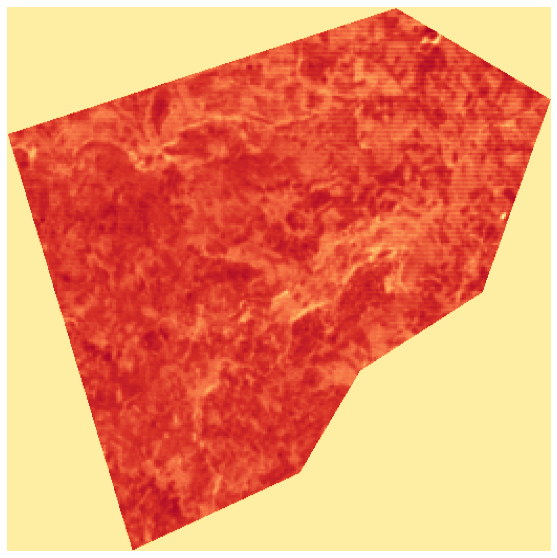

------------ QI_DATA
------ HTML
------ rep_info
--- 04.MSIL1C_17-04-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200417T121239_S20200417T095907
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A016264_20200417T095907
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200417T095029_B01.jp2
--------------- T33SVV_20200417T095029_B02.jp2
--------------- T33SVV_20200417T095029_B03.jp2
--------------- T33SVV_20200417T095029_B04.jp2
--------------- T33SVV_20200417T095029_B05.jp2
--------------- T33SVV_20200417T095029_B06.jp2
--------------- T33SVV_20200417T095029_B07.jp2
--------------- T33SVV_20200417T095029_B08.jp2
--------------- T33SVV_20200417T095029_B09.jp2
--------------- T33SVV_20200417T095029_B10.jp2
--------------- T33SVV_20200417T095029_B11.jp2
--------------- T33SVV_20200417T095029_B12.jp2
--------------- T33SVV_20200417T095029_B8A.jp2
--------------- T33SVV_20200417T095029_TCI.jp2


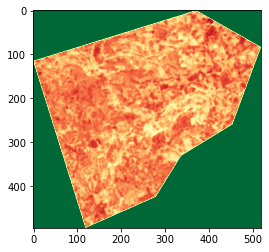

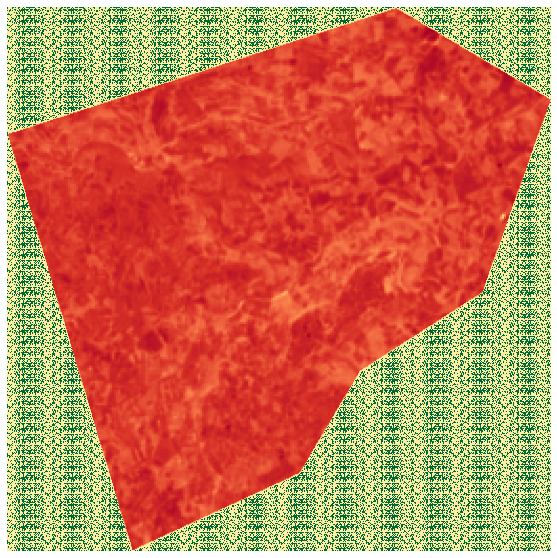

------------ QI_DATA
------ HTML
------ rep_info
--- 05.S2B_MSIL1C_17-05-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200517T120843_S20200517T095822
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A016693_20200517T095822
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200517T095029_B01.jp2
--------------- T33SVV_20200517T095029_B02.jp2
--------------- T33SVV_20200517T095029_B03.jp2
--------------- T33SVV_20200517T095029_B04.jp2
--------------- T33SVV_20200517T095029_B05.jp2
--------------- T33SVV_20200517T095029_B06.jp2
--------------- T33SVV_20200517T095029_B07.jp2
--------------- T33SVV_20200517T095029_B08.jp2
--------------- T33SVV_20200517T095029_B09.jp2
--------------- T33SVV_20200517T095029_B10.jp2
--------------- T33SVV_20200517T095029_B11.jp2
--------------- T33SVV_20200517T095029_B12.jp2
--------------- T33SVV_20200517T095029_B8A.jp2
--------------- T33SVV_20200517T095029_TCI.jp2


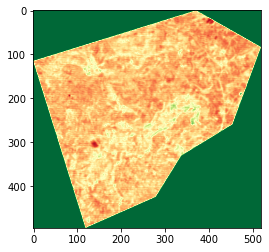

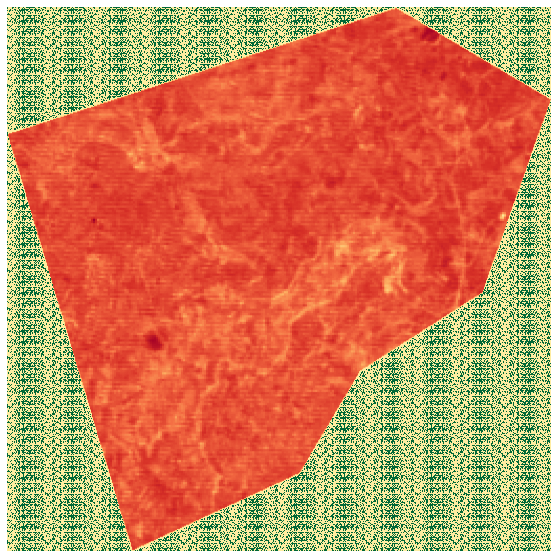

------------ QI_DATA
------ HTML
------ rep_info
--- 06.MSIL1C_26-06-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200626T120527_S20200626T100016
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A017265_20200626T100016
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200626T095029_B01.jp2
--------------- T33SVV_20200626T095029_B02.jp2
--------------- T33SVV_20200626T095029_B03.jp2
--------------- T33SVV_20200626T095029_B04.jp2
--------------- T33SVV_20200626T095029_B05.jp2
--------------- T33SVV_20200626T095029_B06.jp2
--------------- T33SVV_20200626T095029_B07.jp2
--------------- T33SVV_20200626T095029_B08.jp2
--------------- T33SVV_20200626T095029_B09.jp2
--------------- T33SVV_20200626T095029_B10.jp2
--------------- T33SVV_20200626T095029_B11.jp2
--------------- T33SVV_20200626T095029_B12.jp2
--------------- T33SVV_20200626T095029_B8A.jp2
--------------- T33SVV_20200626T095029_TCI.jp2


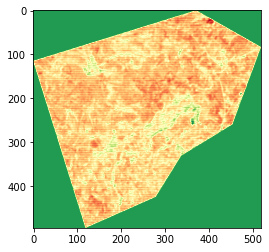

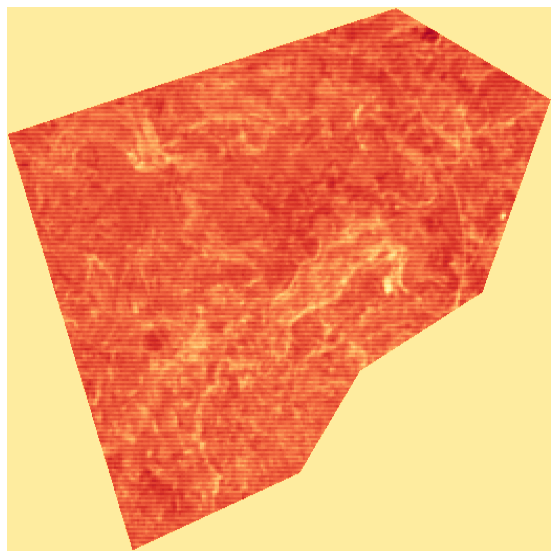

------------ QI_DATA
------ HTML
------ rep_info
--- 07.MSIL1C_31-07-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_MTI__20200731T102505_S20200731T095357
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A026674_20200731T095357
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200731T095041_B01.jp2
--------------- T33SVV_20200731T095041_B02.jp2
--------------- T33SVV_20200731T095041_B03.jp2
--------------- T33SVV_20200731T095041_B04.jp2
--------------- T33SVV_20200731T095041_B05.jp2
--------------- T33SVV_20200731T095041_B06.jp2
--------------- T33SVV_20200731T095041_B07.jp2
--------------- T33SVV_20200731T095041_B08.jp2
--------------- T33SVV_20200731T095041_B09.jp2
--------------- T33SVV_20200731T095041_B10.jp2
--------------- T33SVV_20200731T095041_B11.jp2
--------------- T33SVV_20200731T095041_B12.jp2
--------------- T33SVV_20200731T095041_B8A.jp2
--------------- T33SVV_20200731T095041_TCI.jp2


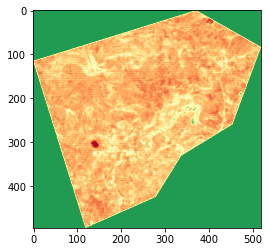

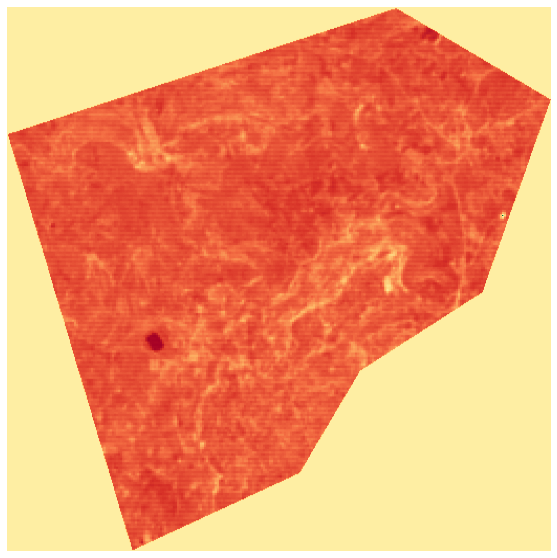

------------ QI_DATA
------ HTML
------ rep_info
--- 08.MSIL1C_12-08-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20200812T111443_S20200812T094034
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A017937_20200812T094034
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200812T094039_B01.jp2
--------------- T33SVV_20200812T094039_B02.jp2
--------------- T33SVV_20200812T094039_B03.jp2
--------------- T33SVV_20200812T094039_B04.jp2
--------------- T33SVV_20200812T094039_B05.jp2
--------------- T33SVV_20200812T094039_B06.jp2
--------------- T33SVV_20200812T094039_B07.jp2
--------------- T33SVV_20200812T094039_B08.jp2
--------------- T33SVV_20200812T094039_B09.jp2
--------------- T33SVV_20200812T094039_B10.jp2
--------------- T33SVV_20200812T094039_B11.jp2
--------------- T33SVV_20200812T094039_B12.jp2
--------------- T33SVV_20200812T094039_B8A.jp2
--------------- T33SVV_20200812T094039_TCI.jp2


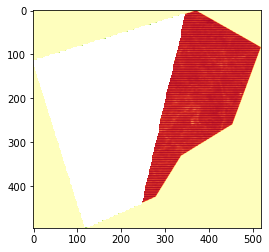

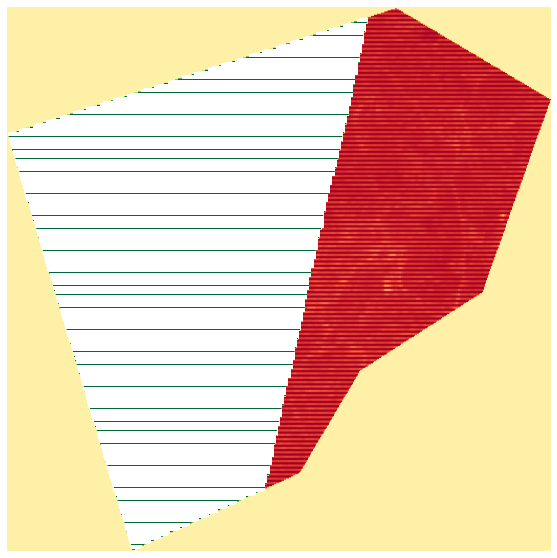

------------ QI_DATA
------ HTML
------ rep_info
--- 09.MSIL1C_24-09-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_VGS2_20200924T120423_S20200924T095911
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A018552_20200924T095911
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200924T095029_B01.jp2
--------------- T33SVV_20200924T095029_B02.jp2
--------------- T33SVV_20200924T095029_B03.jp2
--------------- T33SVV_20200924T095029_B04.jp2
--------------- T33SVV_20200924T095029_B05.jp2
--------------- T33SVV_20200924T095029_B06.jp2
--------------- T33SVV_20200924T095029_B07.jp2
--------------- T33SVV_20200924T095029_B08.jp2
--------------- T33SVV_20200924T095029_B09.jp2
--------------- T33SVV_20200924T095029_B10.jp2
--------------- T33SVV_20200924T095029_B11.jp2
--------------- T33SVV_20200924T095029_B12.jp2
--------------- T33SVV_20200924T095029_B8A.jp2
--------------- T33SVV_20200924T095029_TCI.jp2


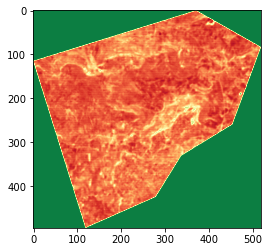

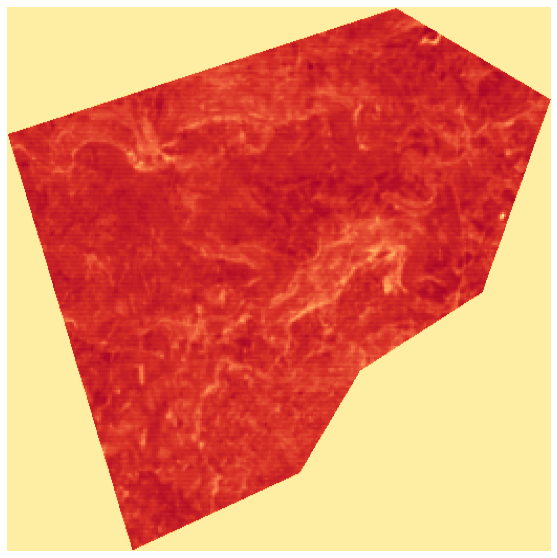

------------ QI_DATA
------ HTML
------ rep_info
--- 10.S2A_MSIL1C_29-10-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_VGS2_20201029T120124_S20201029T100032
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A027961_20201029T100032
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20201029T095131_B01.jp2
--------------- T33SVV_20201029T095131_B02.jp2
--------------- T33SVV_20201029T095131_B03.jp2
--------------- T33SVV_20201029T095131_B04.jp2
--------------- T33SVV_20201029T095131_B05.jp2
--------------- T33SVV_20201029T095131_B06.jp2
--------------- T33SVV_20201029T095131_B07.jp2
--------------- T33SVV_20201029T095131_B08.jp2
--------------- T33SVV_20201029T095131_B09.jp2
--------------- T33SVV_20201029T095131_B10.jp2
--------------- T33SVV_20201029T095131_B11.jp2
--------------- T33SVV_20201029T095131_B12.jp2
--------------- T33SVV_20201029T095131_B8A.jp2
--------------- T33SVV_20201029T095131_TCI.jp2


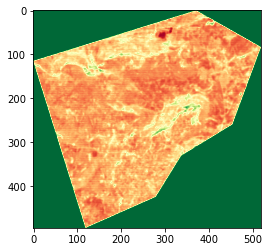

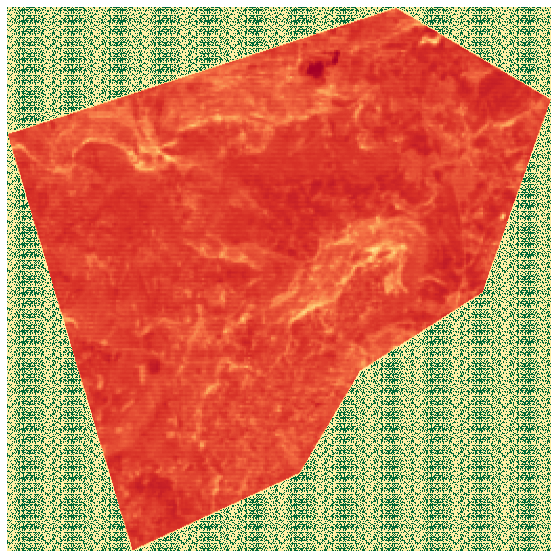

------------ QI_DATA
------ HTML
------ rep_info
--- 12.MSIL1C_05-12-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20201205T110115_S20201205T094357
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A028490_20201205T094357
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20201205T094401_B01.jp2
--------------- T33SVV_20201205T094401_B02.jp2
--------------- T33SVV_20201205T094401_B03.jp2
--------------- T33SVV_20201205T094401_B04.jp2
--------------- T33SVV_20201205T094401_B05.jp2
--------------- T33SVV_20201205T094401_B06.jp2
--------------- T33SVV_20201205T094401_B07.jp2
--------------- T33SVV_20201205T094401_B08.jp2
--------------- T33SVV_20201205T094401_B09.jp2
--------------- T33SVV_20201205T094401_B10.jp2
--------------- T33SVV_20201205T094401_B11.jp2
--------------- T33SVV_20201205T094401_B12.jp2
--------------- T33SVV_20201205T094401_B8A.jp2
--------------- T33SVV_20201205T094401_TCI.jp2


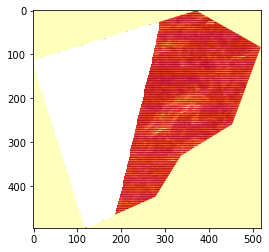

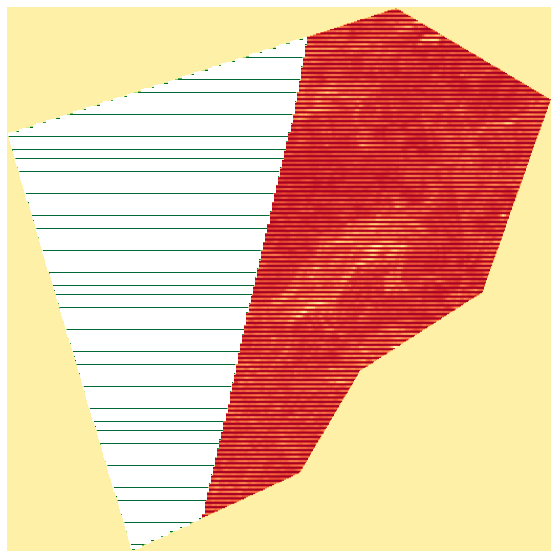

------------ QI_DATA
------ HTML
------ rep_info


In [4]:
path = Path(p)
k=0
# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk(p):
    path = root.split(os.sep)
    print((len(path) - 1) * '---', os.path.basename(root))


    #print(path[:6])

    if os.path.basename(root) == 'IMG_DATA':
        k+=1
        for file in files:
            print(len(path) * '---', file)

            if 'B03' in file: band3 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #Green

            if 'B11' in file: band11 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #NIR

        green = band3.read()
        swir = band11.read()

        # Do not display error when divided by zero
        np.seterr(divide='ignore', invalid='ignore')

        green = np.resize(green,(1, 5490, 5490))
        #swir = np.resize(swir,(1, 10980, 10980))

        # Calculate ndvi
        MNDWI = (green.astype(float)-swir.astype(float))/(green+swir)

        # get the dtype of our MNDWI array:
        MNDWI_dtype = MNDWI.dtype

        # Write the MNDWI image
        meta = band3.meta
        meta.update(driver='GTiff')
        meta.update(dtype=rasterio.float64)

        with rasterio.open('../Output/MNDWI.tif', 'w', **meta) as dst:
            dst.write(MNDWI)

        # Crop MNDWI to ROI
        with rio.open("../Output/MNDWI.tif") as src:
            out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
            out_meta = src.meta.copy()
            out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        with rasterio.open('../Output/MNDWI_cropped.tif', 'w', **meta) as dst:
            dst.write(out_image)
        plot.show(out_image, cmap='RdYlGn')


        # Interpretation of MNDWI
        class MidpointNormalize(colors.Normalize):
            def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
                self.midpoint = midpoint
                colors.Normalize.__init__(self, vmin, vmax, clip)

            def __call__(self, value, clip=None):

                x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
                return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

        # Set min/max values from MNDWI range for image
        min=np.nanmin(out_image)
        max=np.nanmax(out_image)

        # Set our custom midpoint for most effective MNDWI analysis
        mid=0.1

        # Setting color scheme ref:https://matplotlib.org/users/colormaps.html as a reference
        colormap = plt.cm.RdYlGn
        norm = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(111)

        MNDWI_cropped = rasterio.open("../Output/MNDWI_cropped.tif")
        # Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
        cbar_plot = ax.imshow(MNDWI_cropped.read(1), cmap=colormap, vmin=min, vmax=max, norm=norm)

        ax.axis('off')
        #ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

        # Configure the colorbar
        #cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

        # Call 'savefig' to save this plot to an image file
        fig.savefig("../Output/MNDWI-" + str(k) + "-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

        # let's visualize
        plt.show()

---
# RGB (2,3,4)
---

 12 per annum (2020)
--- 01.MSIL1C_18-01-2020
------ AUX_DATA
------ DATASTRIP
--------- DS_EPAE_20200118T110609_S20200118T095554
------------ QI_DATA
------ GRANULE
--------- L1C_T33SVV_A014977_20200118T095554
------------ AUX_DATA
------------ IMG_DATA
--------------- T33SVV_20200118T095229_B01.jp2
--------------- T33SVV_20200118T095229_B02.jp2
--------------- T33SVV_20200118T095229_B03.jp2
--------------- T33SVV_20200118T095229_B04.jp2
--------------- T33SVV_20200118T095229_B05.jp2
--------------- T33SVV_20200118T095229_B06.jp2
--------------- T33SVV_20200118T095229_B07.jp2
--------------- T33SVV_20200118T095229_B08.jp2
--------------- T33SVV_20200118T095229_B09.jp2
--------------- T33SVV_20200118T095229_B10.jp2
--------------- T33SVV_20200118T095229_B11.jp2
--------------- T33SVV_20200118T095229_B12.jp2
--------------- T33SVV_20200118T095229_B8A.jp2
--------------- T33SVV_20200118T095229_TCI.jp2
1
10980
10980
uint16
EPSG:32633
| 10.00, 0.00, 399960.00|
| 0.00,-10.00, 4000020.00|
| 

FileNotFoundError: [Errno 2] No such file or directory: '../Output/HalFarRGB\\Rendered_001.png'

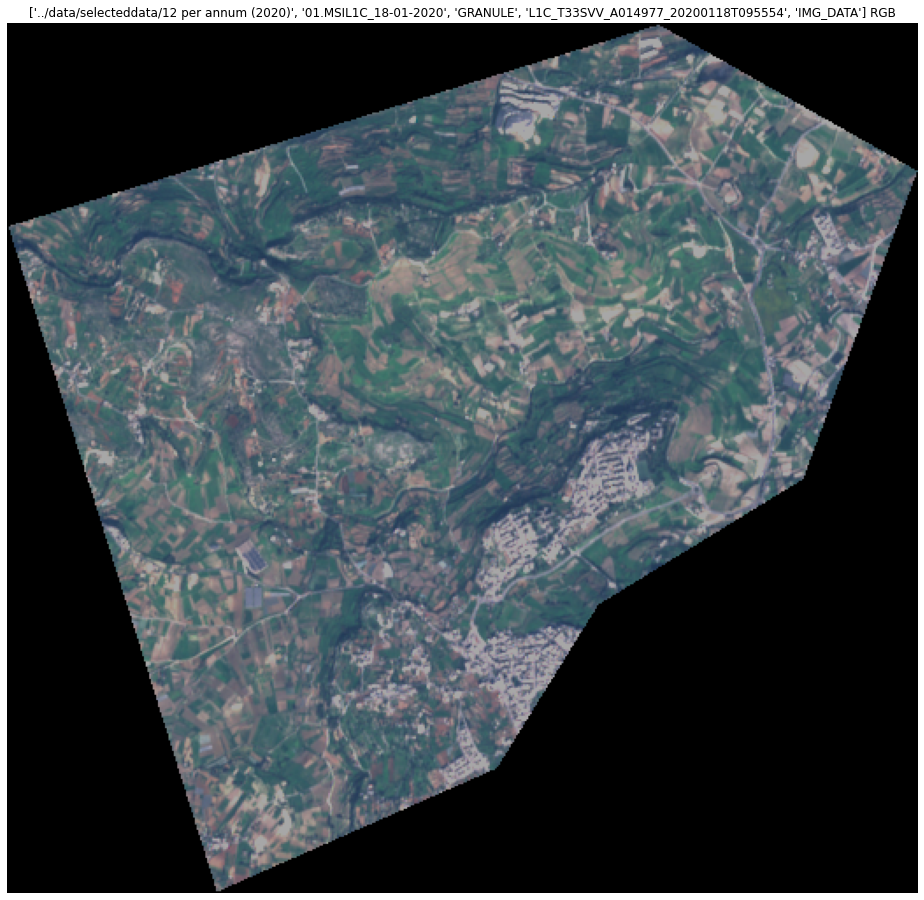

In [5]:
path = Path(p)
k=0
# traverse root directory, and list directories as dirs and files as files
for root, dirs, files in os.walk(p):
    path = root.split(os.sep)
    print((len(path) - 1) * '---', os.path.basename(root))


    #print(path[:6])

    if os.path.basename(root) == 'IMG_DATA':
        k+=1
        for file in files:
            print(len(path) * '---', file)

            if 'B02' in file: band2 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #blue
            #if 'B02_20m' in file: band2 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #blue

            if 'B03' in file: band3 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #green
            #if 'B03_20m' in file: band3 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #green

            if 'B04' in file: band4 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #red
            #if 'B04_20m' in file: band4 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #red

            #if 'B08' in file: band8 = rasterio.open(os.path.join(root,file), driver='JP2OpenJPEG') #nir

        if band2 is not None:
            #number of raster bands
            print(band2.count)
            #number of raster columns
            print(band2.width)
            #number of raster rows
            print(band2.height)

            #type of raster byte
            print(band2.dtypes[0])
            #raster sytem of reference
            print(band2.crs)
            #raster transform parameters
            print(band2.transform)

            #export true color image
            trueColor = rasterio.open('../Output/CACHE/SentinelTemp.tiff','w',driver='Gtiff',
                                     width=band4.width, height=band4.height,
                                     count=3,
                                     crs=band4.crs,
                                     transform=band2.transform,
                                     dtype=band2.dtypes[0]
                                     )
            trueColor.write(band2.read(1),1) #blue
            trueColor.write(band3.read(1),2) #green
            trueColor.write(band4.read(1),3) #red
            trueColor.close()

            with rio.open("../Output/CACHE/SentinelTemp.tiff") as src:
                out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
                out_meta = src.meta.copy()
                out_meta.update({"driver": "GTiff",
                             "height": out_image.shape[1],
                             "width": out_image.shape[2],
                             "transform": out_transform,
                             "dtype": "uint16"})




            # Rescale the image (divide by 10000 to convert to [0:1] reflectance
            image = np.array(out_image[[2,1,0], :, :])
            p2, p98 = np.percentile(image, (2,98))
            image = exposure.rescale_intensity(image, in_range=(p2, p98)) / 100000

            rgb = np.array(image.transpose(1,2,0))

            #Plot and save image with Matplotlib
            fig = plt.figure(figsize=(20,16))
            ax=fig.add_subplot(1,1,1)
            ax.set_title(str(path) +' RGB')
            #fig.suptitle("BOLD TITLE")
            plt.axis('off')
            plt.imshow(rgb)

            #Save scaled reflectance image
            # Call 'savefig' to save this plot to an image file
            file_to_save = 'Rendered_' + str(k).zfill(3) +'.png'
            plt.savefig(os.path.join('../Output/HalFarRGB', file_to_save), bbox_inches='tight', transparent=True, pad_inches=0)
            plt.show()